Задание 1: Random Forest Classifier

Цель задания: Разработать модель машинного обучения, которая сможет классифицировать вина на основе их химических характеристик.



Данные: Использовать уже знакомый набор данных load_wine



Шаги:

Обучить модель случайного леса (Random Forest Classifier) с заданными параметрами на обучающем наборе данных.
Оценить качество модели на тестовой выборке с использованием следующих метрик: отчет о классификации и матрица ошибок.
Определить важность признаков на основе обученной модели и вывести их в порядке убывания значимости.


Дополнительные указания:

Важно провести анализ полученных результатов, интерпретировать матрицу ошибок и отчет о классификации, а также обсудить, какие химические характеристики вина оказались наиболее значимыми для классификации.

По результатам анализа важности признаков студенты могут предложить способы улучшения модели, например, путем отбора признаков или настройки параметров модели.


In [9]:
import pandas as pd
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

data = datasets.load_wine()
dataset = pd.DataFrame(data.data, columns=data.feature_names)
dataset['Target'] = data.target

X = dataset.drop(columns='Target')
y = dataset['Target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

model = RandomForestClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print(f"Confusion matrix:{confusion_matrix(y_test, prediction)}")
print(f"Classification report:{classification_report(y_test, prediction)}")

importance_dict = {model.feature_names_in_[i]: model.feature_importances_[i] for i in range(len(model.feature_importances_))}
importance_dict = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
for feature, importance in importance_dict:
    print(f"{feature}:{importance}")

Confusion matrix:[[19  0  0]
 [ 0 17  0]
 [ 0  0 18]]
Classification report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        18

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

proline:0.18387037959700878
alcohol:0.1554867230466332
flavanoids:0.15273859360520625
od280/od315_of_diluted_wines:0.13022166920271533
color_intensity:0.11983792700305364
hue:0.06174020636577596
total_phenols:0.06021982865697131
alcalinity_of_ash:0.03797969642082931
magnesium:0.031066714987302655
malic_acid:0.02316918289146402
ash:0.015898464436506318
proanthocyanins:0.014644995876258728
nonflavanoid_phenols:0.013125617910274652


**Отчет**:
- Матрица ошибок показывает что модель ни разу не ошиблась. Это может говорить о переобученности модели.
- Также отчет классификаций говорит о переобчуении.
- Самыми важными признаками классификаций стали признаки 'proline','alcohol','flavanoids'


Задание 2: Random Forest Regressor

Цель задания: Разработать модель машинного обучения для предсказания средней стоимости жилья в Калифорнии на основе социально-экономических показателей, используя алгоритм случайного леса (Random Forest Regressor).



Данные: Используйте уже знакомый набор данных "California Housing"



Шаги:

Предварительная обработка данных: Загрузите набор данных и преобразуйте его в DataFrame для удобства работы. Выделите признаки и целевую переменную. Целевая переменная (target) — это средняя стоимость жилья для каждого блока.

Разделение данных: Разделите данные на обучающую и тестовую выборки с помощью функции train_test_split.

Моделирование: Обучите модель случайного леса с заданными параметрами на обучающем наборе данных. Используйте RandomForestRegressor с параметрами n_estimators=200, max_depth=7, max_features='sqrt'.

Оценка модели: Предскажите среднюю стоимость жилья на тестовом наборе данных. Оцените качество модели, рассчитав корень из среднеквадратичной ошибки (RMSE) между фактическими и предсказанными значениями.

Визуализация результатов: Постройте график, на котором фактические значения средней стоимости жилья будут отложены по оси Y, а предсказанные значения — по оси X. Добавьте линию y=x для наглядности соответствия предсказаний действительности.

Анализ важности признаков: Определите и визуализируйте важность признаков в обученной модели. Отсортируйте признаки по убыванию их важности и представьте результаты в удобном формате.



Дополнительные указания:

Обратите внимание на распределение ошибок предсказания и обсудите, как можно улучшить модель.
Рассмотрите возможность настройки гиперпараметров модели для улучшения ее производительности.
Исследуйте, как изменение числа признаков, используемых в модели, влияет на ее точность и интерпретируемость.


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


data = datasets.fetch_california_housing()
dataset = pd.DataFrame(data.data, columns=data.feature_names)
dataset['Target'] = data.target

X = dataset.drop(columns='Target')
y = dataset['Target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

model = RandomForestRegressor(max_depth=7, n_estimators=200, max_features='sqrt')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print(f"RMSE:{mean_squared_error(y_test, prediction) ** (1/2)}")

importance_dict = {model.feature_names_in_[i]: model.feature_importances_[i] for i in range(len(model.feature_importances_))}
importance_dict = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
for feature, importance in importance_dict:
    print(f"{feature}:{importance}")


RMSE:0.6240156060216515
MedInc:0.46637602404449074
Latitude:0.12199895572814742
Longitude:0.11342500255316594
AveOccup:0.113265742754842
AveRooms:0.11275854504280552
HouseAge:0.04205958485752784
AveBedrms:0.021396180936198047
Population:0.00871996408282265


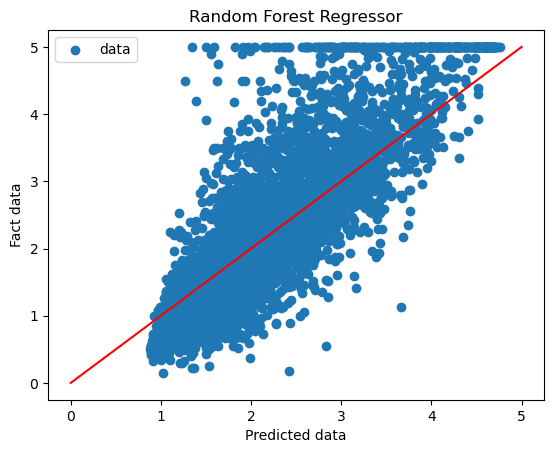

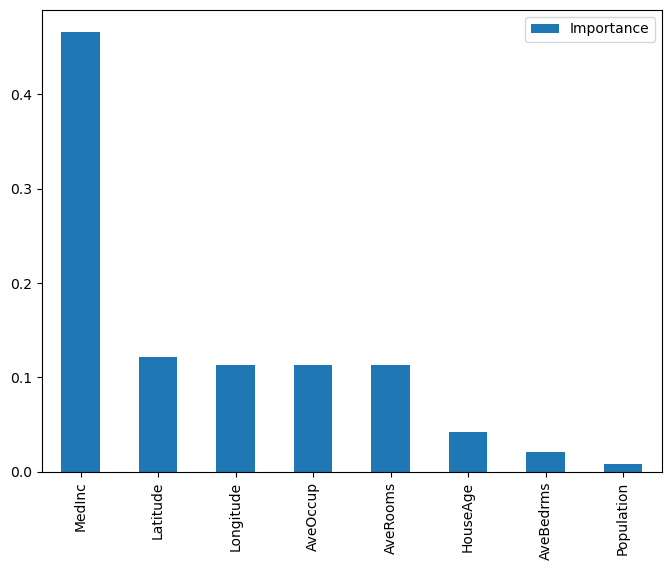

In [12]:
import matplotlib.pyplot as plt


plt.scatter(x=prediction, y=y_test, label='data')
plt.plot([0,5],[0,5], color='red')
plt.title('Random Forest Regressor')
plt.xlabel('Predicted data')
plt.ylabel('Fact data')
plt.legend()


feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.show()

Задание 3: C гиперпараметрами

Цель задания: Разработать оптимизированную модель случайного леса для предсказания средней стоимости жилья в Калифорнии, автоматически подобрав лучшие гиперпараметры модели с помощью поиска по сетке и оценки с использованием кросс-валидации.



Задачи:

Подготовка данных: Загрузите и предобработайте набор данных, разделив его на обучающую и тестовую выборки.

Настройка гиперпараметров: Используйте GridSearchCV из sklearn.model_selection для настройки гиперпараметров RandomForestRegressor. Параметры для настройки подберите собственные

Обучение и оценка модели: Обучите модель с использованием лучших найденных гиперпараметров на обучающем наборе данных. Оцените производительность модели на тестовом наборе, рассчитав корень из среднеквадратичной ошибки (RMSE).

Анализ результатов: Выведите наилучшие гиперпараметры, найденные с помощью GridSearchCV. Анализируйте важность признаков в оптимизированной модели, чтобы понять, какие характеристики наиболее влияют на среднюю стоимость жилья.

In [4]:
from sklearn.model_selection import GridSearchCV

data = datasets.fetch_california_housing()
dataset = pd.DataFrame(data.data, columns=data.feature_names)
dataset['Target'] = data.target

X = dataset.drop(columns='Target')
y = dataset['Target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

model = RandomForestRegressor(random_state=21)
params = {'n_estimators': [100, 200],
          'max_depth': [3,4,5],
          'max_features': [3,5],
         }

In [6]:
model_search = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error')
model_search.fit(X_train, y_train)
prediction = model_search.predict(X_test)

In [7]:
print(f"RMSE:{mean_squared_error(y_test, prediction) ** (1/2)}")

print(model_search.best_estimator_)

importance_dict = {model_search.best_estimator_.feature_names_in_[i]: model_search.best_estimator_.feature_importances_[i] for i in range(len(model_search.best_estimator_.feature_importances_))}
importance_dict = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
for feature, importance in importance_dict:
    print(f"{feature}:{importance}")

RMSE:0.6651961878163204
RandomForestRegressor(max_depth=5, max_features=5, n_estimators=200,
                      random_state=21)
MedInc:0.66358305332469
AveOccup:0.12546998043984453
AveRooms:0.08176483631123588
Latitude:0.0533328190053046
HouseAge:0.034493599077140696
Longitude:0.03197253271927926
AveBedrms:0.007481310285900063
Population:0.0019018688366049326
